In [1]:
#importamos librerias
import pandas as pd
#!pip install clean-text[gpl]
from cleantext import clean
import re
from unidecode import unidecode

#nltk
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

#BERT
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Leemos todos las paginas del excel
sheet_all = pd.read_excel('VELADA_2.xlsx',sheet_name='ALL')
sheet_busta = pd.read_excel('VELADA_2.xlsx',sheet_name='BUSTA')
sheet_luzu = pd.read_excel('VELADA_2.xlsx',sheet_name='LUZU')
sheet_viruz = pd.read_excel('VELADA_2.xlsx',sheet_name='VIRUZ')
sheet_ari = pd.read_excel('VELADA_2.xlsx',sheet_name='ARI')
sheet_caro = pd.read_excel('VELADA_2.xlsx',sheet_name='CARO')

In [3]:
#Vamos a contar el numero de comentarios que tienen más de 20 likes para cada video.
likes_20_all = sheet_all[sheet_all['Likes']>20]
likes_20_busta = sheet_busta[sheet_busta['Likes']>20]
likes_20_luzu = sheet_luzu[sheet_luzu['Likes']>20]
likes_20_viruz = sheet_viruz[sheet_viruz['Likes']>20]
likes_20_ari = sheet_ari[sheet_ari['Likes']>20]
likes_20_caro = sheet_caro[sheet_caro['Likes']>20]

#Aqui vemos cuantos likes hay en cada video con más de 20.
long_all = len(likes_20_all)
long_busta = len(likes_20_busta)
long_luzu = len(likes_20_luzu)
long_viruz = len(likes_20_viruz)
long_ari = len(likes_20_ari)
long_caro = len(likes_20_caro)


print(f'Hay {long_all} comentarios con más de 20 likes en el video completo de 5h')
print(f'Hay {long_busta} comentarios con más de 20 likes en Bustamante VS Jagger')
print(f'Hay {long_luzu} comentarios con más de 20 likes en Luzu VS Lolito')
print(f'Hay {long_viruz} comentarios con más de 20 likes en Viruz VS Momo')
print(f'Hay {long_ari} comentarios con más de 20 likes en Arigameplays VS Paracetamor')
print(f'Hay {long_caro} comentarios con más de 20 likes en Carola VS Spursito')

Hay 108 comentarios con más de 20 likes en el video completo de 5h
Hay 106 comentarios con más de 20 likes en Bustamante VS Jagger
Hay 75 comentarios con más de 20 likes en Luzu VS Lolito
Hay 277 comentarios con más de 20 likes en Viruz VS Momo
Hay 391 comentarios con más de 20 likes en Arigameplays VS Paracetamor
Hay 59 comentarios con más de 20 likes en Carola VS Spursito


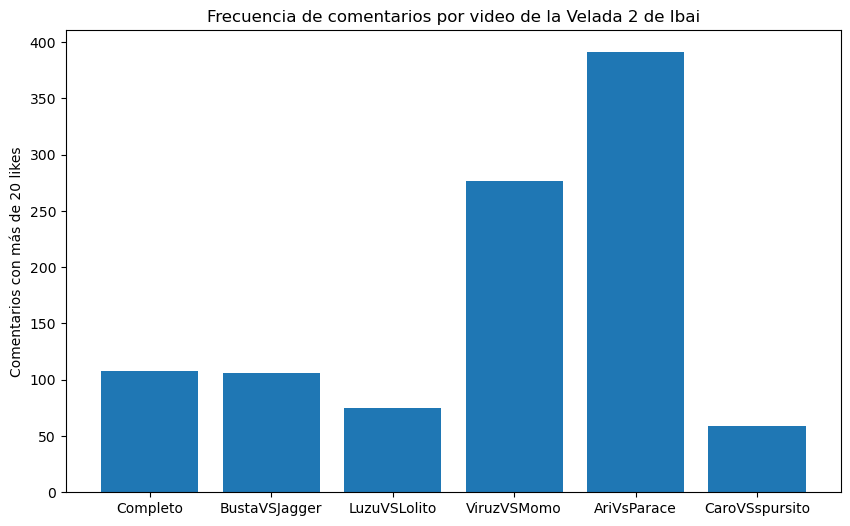

In [11]:
import matplotlib.pyplot as plt

longitudes = [long_all, long_busta, long_luzu, long_viruz, long_ari, long_caro]

plt.figure(figsize=(10, 6)) # ajustar el tamaño de la figura

plt.bar(['Completo', 'BustaVSJagger', 'LuzuVSLolito', 'ViruzVSMomo', 'AriVsParace', 'CaroVSspursito'], longitudes)
plt.ylabel('Comentarios con más de 20 likes')
plt.title('Frecuencia de comentarios por video de la Velada 2 de Ibai')
plt.show()

In [13]:
every_comment = sheet_all.append(sheet_busta)
every_comment = every_comment.append(sheet_luzu)
every_comment = every_comment.append(sheet_viruz)
every_comment = every_comment.append(sheet_ari)
every_comment = every_comment.append(sheet_caro)

C:\Users\Mario\AppData\Local\Temp\ipykernel_15468\117760020.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  every_comment = sheet_all.append(sheet_busta)
C:\Users\Mario\AppData\Local\Temp\ipykernel_15468\117760020.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  every_comment = every_comment.append(sheet_luzu)
C:\Users\Mario\AppData\Local\Temp\ipykernel_15468\117760020.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  every_comment = every_comment.append(sheet_viruz)
C:\Users\Mario\AppData\Local\Temp\ipykernel_15468\117760020.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  every_comment = every_comment.append(sheet_ari)
C:\

In [14]:
#No quiero tener en cuenta las respuestas al comentario original por lo que eliminaré todas las filas que contengan NaN en 
#la columna Comment

every_comment.dropna(subset=['Comment'], inplace=True)

#elimino las filas donde no hay nada
every_comment.dropna(axis=0, how='all', inplace=True)

In [15]:
every_comment

,Channel URL,Name,Comment,Time,Likes,Reply Count,Reply Author,Reply,Published,Updated
0,http://www.youtube.com/channel/UCpnmqlPSrAJxou...,Jandrigoodd,LUZU PARECIA PORTA JAJAJAJAJAJAJAAJ,2023-04-20T22:59:15Z,0.0,0.0,NaN,NaN,NaN,NaN
1,http://www.youtube.com/channel/UCpnmqlPSrAJxou...,Jandrigoodd,VELADA DEL AÑO 4 JAGGER VS IPPO,2023-04-20T18:48:00Z,0.0,0.0,NaN,NaN,NaN,NaN
2,http://www.youtube.com/channel/UCpnmqlPSrAJxou...,Jandrigoodd,"oe que tramposo en el minuto <a href=""https:/...",2023-04-20T18:43:10Z,0.0,0.0,NaN,NaN,NaN,NaN
3,http://www.youtube.com/channel/UCpnmqlPSrAJxou...,Jandrigoodd,en el de viruz y momo que honda el casco de mo...,2023-04-20T18:41:33Z,0.0,0.0,NaN,NaN,NaN,NaN
4,http://www.youtube.com/channel/UCLY-oCR9rvTNeT...,CN X,Lo de luzu y lolito Vi la pelea muy inestables 😢,2023-04-20T02:44:21Z,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2607,http://www.youtube.com/channel/UCi85KUBWCu9CMH...,leonela,hjajajaj,2022-06-25T18:09:03Z,0.0,0.0,NaN,NaN,NaN,NaN
2608,http://www.youtube.com/channel/UCRtGFXFuRQ_ItS...,Solo_yo_yla_musica,Vamooo,2022-06-25T18:09:02Z,1.0,0.0,NaN,NaN,NaN,NaN
2609,http://www.youtube.com/channel/UCmRqnQKmEKnjh5...,Miguel Legy,Tercero,2022-06-25T18:09:02Z,0.0,0.0,NaN,NaN,NaN,NaN
2610,http://www.youtube.com/channel/UC0vvooApRzLyHF...,escobar,Segundo,2022-06-25T18:09:02Z,1.0,0.0,NaN,NaN,NaN,NaN


En total tenemos 28742 comentarios el 25/04/2023. Sin embargo, como queremos saber cuales de ellos son los virales, vamos a 
tener en cuenta el número de Likes que tiene cada comentario. Fijando un criterio arbitrario, podemos decir que tener 20 likes
en un comentario ya empieza a ser un comentario representativo en el canal, por lo que, vamos a señalar que tener 20 likes
es un comentario viral en un video de youtube.

Vamos a quedarnos con la columna Comment y likes por el momento. Se podria hacer el enfoque en ver si un comentario con más
reply es más viral para ganar más información incluso ver tambien en la columna Name si la persona que escribe ese mensaje tiende a ser viral en los comentarios. Vamos a hacer ese estudio:

In [16]:
first_study = every_comment[['Name','Likes']]
#first_study['Likes'] = first_study['Likes'].astype(int)
first_study.to_csv('prueba.csv',index=False)
alfonso = pd.read_csv('prueba.csv')
df = alfonso.groupby('Name')['Likes'].sum()
df = df.to_frame()
df.reset_index(inplace=True)

In [17]:
name_with_20 = df[df['Likes']>20]['Name']
name_with_20 = name_with_20.to_frame()

In [18]:
#Estos son los nombres que tienen tendencia a ser más votados.
nombres_con_tendencia_20 = alfonso.loc[alfonso['Name'].isin(name_with_20['Name'])]

#Quiero contar el numero de veces que se repite cada Name
group = nombres_con_tendencia_20.groupby(['Name'])
count_nombres_con_tendencia_20 = group.count()
count_nombres_con_tendencia_20 = count_nombres_con_tendencia_20.reset_index()

In [19]:
count_nombres_con_tendencia_20 = count_nombres_con_tendencia_20.sort_values(by='Likes', ascending=False)
count_nombres_con_tendencia_20[:60]

,Name,Likes
201,Diego,18
126,Carlos,12
406,Javier,11
20,Agustín,9
27,Ale,8
174,Daniel,7
510,LaRubia,7
136,Cesar Guedes,7
403,Javi,6
308,Freicher Dionisio P.,6


In [11]:
every_comment[every_comment['Name']=='Diego']

,Channel URL,Name,Comment,Time,Likes,Reply Count,Reply Author,Reply,Published,Updated
1636,http://www.youtube.com/channel/UCy3yJUSs_t89lg...,Diego,¡De los mejores eventos sin duda experiencias ...,2022-06-27T16:45:26Z,1.0,0.0,NaN,NaN,NaN,NaN
3715,http://www.youtube.com/channel/UCApt_qlglJaTNO...,Diego,"Bustamante le falta resistencia, yo creo que c...",2022-06-25T22:48:16Z,5.0,0.0,NaN,NaN,NaN,NaN
4080,http://www.youtube.com/channel/UCbTKmm8Uk96T01...,Diego,Y que pasó con el de la casa de papel???,2022-06-25T22:16:14Z,0.0,0.0,NaN,NaN,NaN,NaN
2879,http://www.youtube.com/channel/UCgwuW2bOmQokY1...,Diego,hola,2022-06-25T20:24:22Z,1.0,0.0,NaN,NaN,NaN,NaN
79,http://www.youtube.com/channel/UCyflkUte0nTqIx...,Diego,Obviamente viruz ya había ganado la pelea pero...,2023-03-14T18:46:36Z,0.0,0.0,NaN,NaN,NaN,NaN
1967,http://www.youtube.com/channel/UCSI-Rv83xtRRio...,Diego,Me gustaría una velada con Yaman el Diamante y...,2022-06-27T17:15:06Z,0.0,0.0,NaN,NaN,NaN,NaN
3642,http://www.youtube.com/channel/UCnh0qo3noXHpEv...,Diego,La presentación de Momo es goood <br>Que pena ...,2022-06-26T16:05:24Z,7.0,0.0,NaN,NaN,NaN,NaN
4600,http://www.youtube.com/channel/UCg1s6AGYvYp0RN...,Diego,Nose se quien carajos es pero ese Momo se llev...,2022-06-26T09:08:13Z,6.0,0.0,NaN,NaN,NaN,NaN
8998,http://www.youtube.com/channel/UCVPFhEL2QJ0R7M...,Diego,"grande momo aguante Platense papá,,,",2022-06-25T21:57:15Z,0.0,0.0,NaN,NaN,NaN,NaN
9524,http://www.youtube.com/channel/UCkuU0gVILgtVXa...,Diego,"El nivel estaba muy desnivelado , se tenía que...",2022-06-25T21:29:44Z,1.0,0.0,NaN,NaN,NaN,NaN


No podemos tener en cuenta el nombre ya que no es un identificador unico, se necesitaria un ID como por ejemplo la url de su canal de youtube para poder mapear el recorrido de comentarios que hace cada persona. Sin embargo, podemos pensar que dar un trato distinto a otra persona por haber sido viral, no implica que en el futuro se vaya a comportar así. Es por tanto que no podemos tener en cuenta el origen del comentario en nuestro estudio de la busqueda del comentario perfecto.

In [12]:
#!pip install clean-text[gpl]

Volvamos por tanto a nuesro caso de Comment y Likes

-  Eliminar caracteres especiales y puntuación.
-  Eliminar números.
-  Eliminar palabras vacías (stopwords).
-  Lematizar o stemizar las palabras.
-  Eliminar emojis..............................................XX
-  Convertir todo el texto a minúsculas.............XX

In [20]:
comment_vs_likes = every_comment[['Comment','Likes']]

#limpiar el uso de emoticonos es útil a la hora de hacer NLP (Procesamiento del Lenguaje Natural). 
#Los emoticonos pueden ser una fuente de ruido en los datos de texto y pueden afectar negativamente el 
#rendimiento del modelo de NLP. Por lo tanto, es importante eliminarlos antes de procesar los datos de texto.
comment_vs_likes['Comment'] = comment_vs_likes['Comment'].apply(lambda x: clean(x, no_emoji=True))

#Convertir todas las letras de una columna de un DataFrame de pandas a minúsculas es una buena práctica
#en NLP porque ayuda a evitar problemas de inconsistencia en los datos. 
#Por ejemplo, si tienes una columna que contiene nombres de personas y algunos
#nombres están en mayúsculas y otros en minúsculas, esto puede causar problemas 
#al intentar buscar o filtrar los datos. Al convertir todas las letras a minúsculas, 
#se asegura de que los datos sean consistentes y más fáciles de trabajar.

comment_vs_likes['Comment'] = comment_vs_likes['Comment'].str.lower()


#Tambien se observa muchos comentarios que tienen como enlace un http. Esto significa que tiene una cierta referencia a 
# un momento exacto del canal,vamos a ver el numero cuantos http contiene que sean mayores de 50 likes

mask = comment_vs_likes['Comment'].str.contains('http')
comentarios_con_http_virales = len(comment_vs_likes[mask][comment_vs_likes[mask]['Likes']>20])

print(f'Hay {comentarios_con_http_virales} comentarios virales con http escritos en el comentario')

todos_comentarios_virales = len(comment_vs_likes[comment_vs_likes['Likes']>20])
print(f'Hay {todos_comentarios_virales} comentarios virales en todo el dataset')

#Es por tanto que representa el 15% de comentarios virales en todo el dataset. Se podria tener en cuenta para un ajuste
#más fino. Sin embargo, me limitaré a borrar estos comentarios pues no sé a priori como de bien va a salir mi modelo 
#predictivo. En el caso de necesitarse, sería buena idea volver a este apartado.

mask = comment_vs_likes['Comment'].str.contains('http')
comment_vs_likes = comment_vs_likes[~mask]

#Se observa que aparece <br> en los comentarios, todos ellos se borran al no aportar ningun valor: 
mask = comment_vs_likes['Comment'].str.contains('<br>')
comment_vs_likes = comment_vs_likes[~mask]

#Se observa que aparece <a href en los comentarios, se elimina 

mask = comment_vs_likes['Comment'].str.contains('<a href')
comment_vs_likes = comment_vs_likes[~mask]

#Se observa que aparece <b> y </b> en los comentarios, se sustituye por ""
comment_vs_likes['Comment'] = comment_vs_likes['Comment'].replace('<b>', '')
comment_vs_likes['Comment'] = comment_vs_likes['Comment'].replace('</b>', '')


#Por errores de la API de youtube, no ajusta bien la ñ y la cambia a n, la pasamos nosotros ad hoc para la palabra "año"
comment_vs_likes['Comment'] = comment_vs_likes['Comment'].replace('ano', 'año')


#Un aspecto importante es que en el uso del lenguaje a nosotros podemos ver la palabra león ó leon y sabemos reconocer esa
#palabra. Sin embargo es buena práctica quitar las tildes a las palabras para que haya una armonia en los comentarios.
comment_vs_likes['Comment'] = comment_vs_likes['Comment'].apply(lambda x: x.encode('utf-8').decode('utf-8'))


#También quitamos las interrogaciones, exclamaciones...etc
comment_vs_likes['Comment'] = comment_vs_likes['Comment'].replace(to_replace=r'[^\w\s]', value='', regex=True).str.lower()


Hay 68 comentarios virales con http escritos en el comentario
Hay 1016 comentarios virales en todo el dataset


C:\Users\Mario\AppData\Local\Temp\ipykernel_15468\2198059645.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_vs_likes['Comment'] = comment_vs_likes['Comment'].apply(lambda x: clean(x, no_emoji=True))
C:\Users\Mario\AppData\Local\Temp\ipykernel_15468\2198059645.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_vs_likes['Comment'] = comment_vs_likes['Comment'].str.lower()


Estoy interesado en crear una nueva columna que nos diga el grado de satisfacción de cada comentario

### USANDO CHATGPT

### USANDO NLTK para sentimientos

In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

#Analizo el sentimiento de mi dataframe y creo la columna sentiment_nltk
comment_vs_likes['sentiment_nltk'] = comment_vs_likes['Comment'].apply(get_sentiment)

In [15]:
comment_vs_likes.to_excel('todos_con_nltk.xlsx',index=False)

## Usando BERT para sentimientos

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

comment_vs_likes['sentiment_BERT'] = comment_vs_likes['Comment'].apply(lambda x: sentiment_score(x[:512]))


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
comment_vs_likes['sentiment_BERT'] = comment_vs_likes['Comment'].apply(lambda x: sentiment_score(x[:512]))

comment_vs_likes.to_excel('borrar.xlsx',index=False)

### Para todos aquellos comentarios que tienen más de 20 likes ---> predict =1

In [26]:
comment_vs_likes['predict'] = (comment_vs_likes['Likes'] >= 20).astype(int)

In [27]:
comment_vs_likes.isnull().sum()

Comment           0
Likes             0
predict           0
sentiment_nltk    0
dtype: int64

In [28]:
comment_vs_likes

,Comment,Likes,predict,sentiment_nltk
0,luzu parecia porta jajajajajajajaaj,0.0,0,0.0000
1,velada del ano 4 jagger vs ippo,0.0,0,0.0000
3,en el de viruz y momo que honda el casco de mo...,0.0,0,0.0000
4,lo de luzu y lolito vi la pelea muy inestables,0.0,0,0.0000
5,tremendo evento pero por lo menos en la parte ...,0.0,0,-0.5423
...,...,...,...,...
2607,hjajajaj,0.0,0,0.0000
2608,vamooo,1.0,0,0.0000
2609,tercero,0.0,0,0.0000
2610,segundo,1.0,0,0.0000


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

#Tokenizar
from nltk.tokenize import word_tokenize

x = comment_vs_likes[['Comment','Likes','sentiment_nltk']]
y = comment_vs_likes[['predict']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y) #Stratify para balancear registros.


x_train['Comment_tokenize'] = x_train['Comment'].apply(word_tokenize)
x_test['Comment_tokenize'] = x_test['Comment'].apply(word_tokenize)

## VISUALIZAMOS PALABRAS MAS FRECUENTES CON STOPWORDS Y SIN STOPWORDS

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
%matplotlib inline 
import seaborn as sns

from matplotlib import pyplot as plt

def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('spanish'))
    
    new = text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    
    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    
    plt.figure(figsize=(10,5))
    plt.bar(x,y)

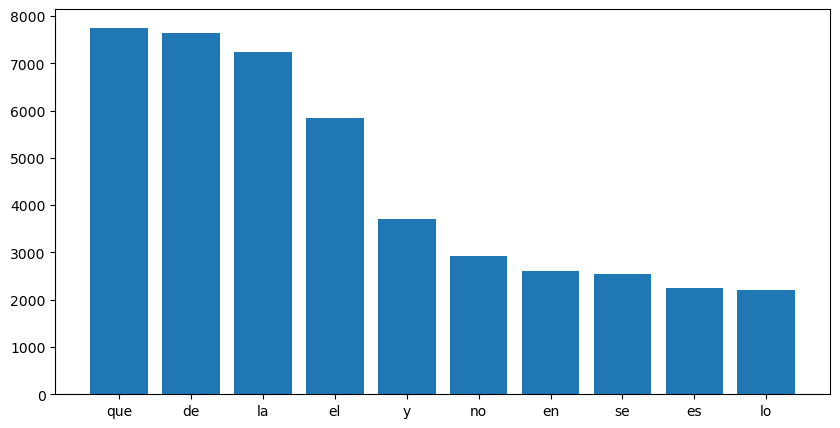

In [35]:
plot_top_stopwords_barchart(x_train['Comment'])

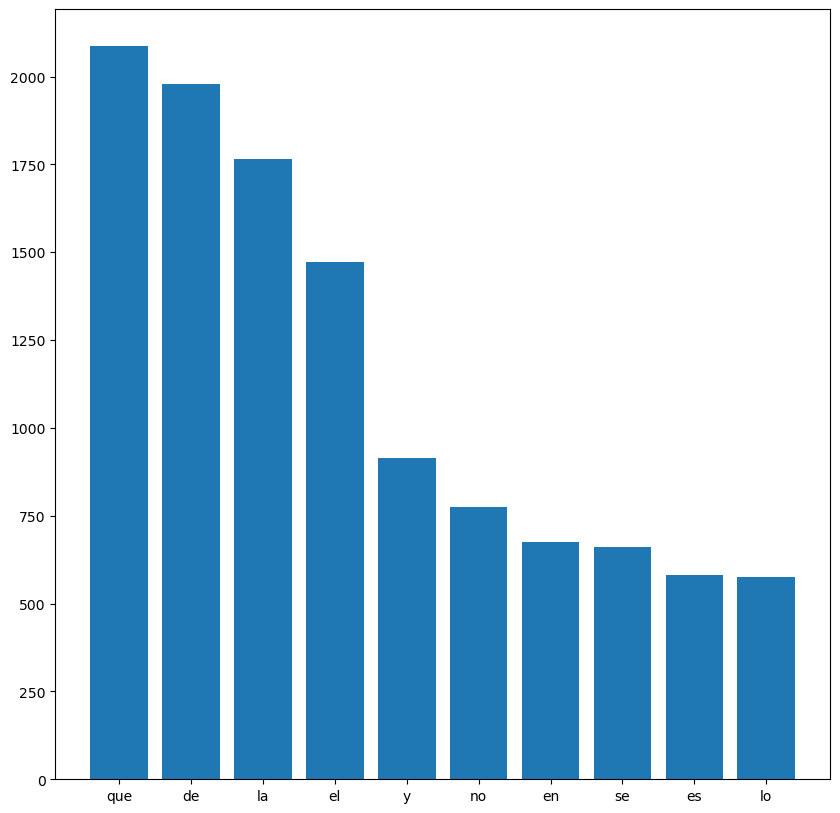

In [33]:
plot_top_stopwords_barchart(x_test['Comment'])

In [38]:
#Ahora sin stopwords

import seaborn as sns
from collections import Counter

def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('spanish'))
    
    new = text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    counter = Counter(corpus)
    
    most = counter.most_common()
    x,y = [],[]
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,5))
    sns.barplot(x=y,y=x)

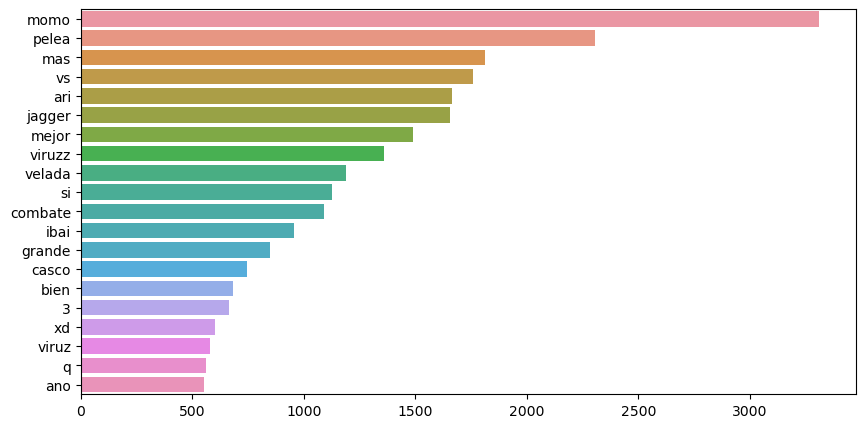

In [39]:
plot_top_non_stopwords_barchart(x_train['Comment'] )

In [ ]:
plot_top_non_stopwords_barchart(x_test['Comment'] )

# Quitamos stopwords del dataframe

In [ ]:
x_train['Comment_tokenize'] = x_train['Comment_tokenize'].apply(lambda x: [word for word in x if word not in stop_words])
x_train['Comment_tokenize_join'] = [' '.join(map(str,l)) for l in x_train['Comment_tokenize']]

In [ ]:
x_test['Comment_tokenize'] = x_test['Comment_tokenize'].apply(lambda x: [word for word in x if word not in stop_words])
x_test['Comment_tokenize_join'] = [' '.join(map(str,l)) for l in x_test['Comment_tokenize']]

## Podemos ver la cantidad de verbos, adverbios, sustantivos...etc 

In [ ]:
nltk.download('averaged_perceptron_tagger')


#TRAIN
tagged_stanzas_train = []
tagged_train = []

for word in x_train['Comment_tokenize']:
    tagged_word = nltk.pos_tag(word)
    tagged_stanzas_train.append(tagged_word)
#Este formato es necesario para la siguiente visualizacion ya que necesita dos valores
tagged_train.append(tagged_stanzas_train)

#TEST

tagged_stanzas_test = []
tagged_test = []

for word in x_test['Comment_tokenize']:
    tagged_word = nltk.pos_tag(word)
    tagged_stanzas_test.append(tagged_word)
#Este formato es necesario para la siguiente visualizacion ya que necesita dos valores
tagged_test.append(tagged_stanzas_test)

In [ ]:
#!pip install -U yellowbrick
from yellowbrick.text import PosTagVisualizer

plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged_train)
viz.show()

In [ ]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(tagged_test)
viz.show()

In [ ]:
#Contamos la cantidad de 1 y 0 que tenemos en train
y_train['predict'].value_counts()

In [ ]:
#Contamos la cantidad de 1 y 0 que tenemos en test
y_test['predict'].value_counts()

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
sns.countplot(x=y_train['predict'])

In [ ]:
rcParams['figure.figsize'] = 10,8
sns.countplot(x=y_test['predict'])

# Machine learning model --> primera aproximación

# tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1,2))

#Se hace la transformacion a la columna Comment


In [ ]:
x_train_counts = count_vectorizer.fit_transform(x_train['Comment'].values)

In [ ]:
x_train_tfidf = transformer.fit_transform(x_train_counts)
y_train_tfidf = y_train

In [ ]:
#Voy a hacer un split tal que vuelvo a dividir train y test mis antiguos datos de train just for saber que hace la paya

x_train,x_test,y_train,y_test = train_test_split(x_train_tfidf,y_train_tfidf,stratify=y_train_tfidf)

# ExtraTreesClassifier --> Overfit?

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

Extr = ExtraTreesClassifier(n_estimators=5,n_jobs=4)
Extr.fit(x_train,y_train)

In [ ]:
print('Accuracy of ExtraTreesClassifier  on training set: {:.2f}'.format(Extr.score(x_train,y_train)))
print('Accuracy of ExtraTreesClassifier  on test set: {:.2f}'.format(Extr.score(x_test,y_test)))

# AdaBoostClassifier 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


Adab = AdaBoostClassifier(n_estimators=5)
Adab.fit(x_train,y_train)

In [ ]:
print('Accuracy of AdaBoostClassifier  on training set: {:.2f}'.format(Adab.score(x_train,y_train)))
print('Accuracy of AdaBoostClassifier  on test set: {:.2f}'.format(Adab.score(x_test,y_test)))

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomFC = RandomForestClassifier(n_estimators=5)
RandomFC.fit(x_train,y_train)

print('Accuracy of RandomForestClassifier  on training set: {:.2f}'.format(RandomFC.score(x_train,y_train)))
print('Accuracy of RandomForestClassifier  on test set: {:.2f}'.format(RandomFC.score(x_test,y_test)))

# MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(x_train,y_train)

print('Accuracy of MultinomialNB  on training set: {:.2f}'.format(NB.score(x_train,y_train)))
print('Accuracy of MultinomialNB  on test set: {:.2f}'.format(NB.score(x_test,y_test)))

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1e5)
logreg.fit(x_train,y_train)

print('Accuracy of LogisticRegression  on training set: {:.2f}'.format(logreg.score(x_train,y_train)))
print('Accuracy of LogisticRegression  on test set: {:.2f}'.format(logreg.score(x_test,y_test)))

## Precision y recall de LogisticRegression

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
predictions = logreg.predict(x_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f'Accuracy: {round(precision*100,2)}%')
print(f'recall: {round(recall*100,2)}%')

# ConfusionMatrix de LogisticRegression

In [ ]:
from sklearn import metrics

CM = metrics.confusion_matrix(y_test,predictions)

In [ ]:
CM

In [ ]:
plt.figure(figsize=(9,9))

sns.heatmap(CM, annot=True, fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

https://www.youtube.com/watch?v=sm0NoO5aYC0&ab_channel=WomenWhoCode

# Preparamos los datos para introducirlo en LogisticRegresion y XgBoost

In [ ]:
comment_vs_likes = pd.read_excel('first.xlsx')

import nltk
from nltk.corpus import stopwords

# Descargar las stopwords en caso de que no estén descargadas
nltk.download('stopwords')

# Crear un set de stop_words
stop_words = set(stopwords.words('spanish'))

# Aplicar la función lambda para eliminar las stopwords
comment_vs_likes['Comment'] = comment_vs_likes['Comment'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))

comment_vs_likes['predict'] = (comment_vs_likes['Likes'] >= 1).astype(int)
comment_vs_likes['predict'].value_counts()

In [ ]:
comment_vs_likes.

In [ ]:
# Elimino aleatoriamente 
import numpy as np

n = len(comment_vs_likes[comment_vs_likes['predict'] == 0])
print(n)
# Seleccionar aleatoriamente las filas a eliminar
drop_indices = np.random.choice(comment_vs_likes[comment_vs_likes['predict'] == 0].index, n - 2000, replace=False)

# Eliminar las filas seleccionadas
comment_vs_likes = comment_vs_likes.drop(drop_indices)


In [ ]:
comment_vs_likes['predict'].value_counts()

In [ ]:
comment_vs_likes = comment_vs_likes.reset_index(drop=True)

In [ ]:
comment_vs_likes.to_excel('second.xlsx',index=False)

In [4]:
comment_vs_likes = pd.read_excel('sentimientos8kBERT.xlsx')

In [5]:
comment_vs_likes

,Comment,Likes,sentiment_nltk,predict,sentiment_BERT
0,velada ano 4 jagger vs ippo,0,0.0000,0,1
1,merecia carola ganar,0,0.0000,0,5
2,quiero ser sentimental aca abuela viruz,1,0.0258,0,1
3,espectacular ibai logrado evento aplausos verd...,0,0.3400,0,5
4,reunion personas menos 72 iq,0,0.0000,0,3
...,...,...,...,...,...
8719,combate bueno,39,0.0000,1,4
8720,siiiuuuu,0,0.0000,0,3
8721,tongo,0,0.0000,0,3
8722,vamooo,1,0.0000,0,1


In [ ]:
import pandas as pd
comment_vs_likes = pd.read_excel('third.xlsx')

In [9]:
comment_vs_likes.dropna(subset=['Comment'], inplace=True)

C:\Users\Mario\AppData\Local\Temp\ipykernel_11384\4275669321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comment_vs_likes.dropna(subset=['Comment'], inplace=True)


,Comment,sentiment_nltk,sentiment_BERT,predict
0,velada ano 4 jagger vs ippo,0.0000,1,0
1,merecia carola ganar,0.0000,5,0
2,quiero ser sentimental aca abuela viruz,0.0258,1,0
3,espectacular ibai logrado evento aplausos verd...,0.3400,5,0
4,reunion personas menos 72 iq,0.0000,3,0
...,...,...,...,...
8719,combate bueno,0.0000,4,1
8720,siiiuuuu,0.0000,3,0
8721,tongo,0.0000,3,0
8722,vamooo,0.0000,1,0


In [10]:
comment_vs_likes = comment_vs_likes.reset_index(drop=True)

In [12]:
comment_vs_likes = comment_vs_likes[['Comment','sentiment_nltk','sentiment_BERT','predict']]

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA


transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1,2))


x_all = count_vectorizer.fit_transform(comment_vs_likes['Comment'].values)
x_all_tfidf = transformer.fit_transform(x_all)



# Convertir la matriz dispersa en un DataFrame de Pandas
df = pd.DataFrame.sparse.from_spmatrix(x_all_tfidf)
df['6969696969'] = comment_vs_likes['sentiment_nltk']
df['sentiment_bert'] = comment_vs_likes['sentiment_BERT']
df.columns= df.columns.astype(str)#To prevent error in logistic regresion


#TENGO 13.9GB DE ARRAY POR LO QUE ME DA ERROR EN MI ORDENADOR YA QUE TENGO UNA PATATA Y NO TIENE RAM----> HAGO PCA 
##pca = PCA(n_components=1000)
##df = pca.fit_transform(df)

#SALE PEOR PORQUE ME PIDE AHORA 18GB
#Dividimos el dataset
x_train,x_test,y_train,y_test = train_test_split(df,comment_vs_likes['predict'],stratify=comment_vs_likes['predict'])

#HAGO SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_train, y_train = smote.fit_resample(x_train, y_train)

In [14]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Vamos a entrenar una regresion logistica

### Primero hacemos validación cruzada

In [ ]:
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression()

# Crear un diccionario con los hiperparámetros y los valores a probar
param_grid = {'C': [30,40,50],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(lr, param_grid=param_grid)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Obtener el mejor modelo y los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


In [ ]:
best_params

# Entrenamos el modelo con esos hiperparametros

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score


# Crear el modelo de regresión logística
lr = LogisticRegression(C=40, penalty = 'l2', solver ='liblinear')

# Entrenar el modelo con los datos de entrenamiento
lr.fit(x_train, y_train)

C:\Users\Mario\anaconda3\lib\site-packages\sklearn\utils\validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


MemoryError: Unable to allocate 1.99 GiB for an array with shape (40889, 6536) and data type float64

# Curva ROC

In [ ]:
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt

# Predecir las probabilidades de clase para los datos de prueba
y_pred_prob = lr.predict_proba(x_test)[:,1]

# Calcular la curva ROC y el AUC ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.show()

In [ ]:
from sklearn import metrics
predictions = lr.predict(x_test)

CM = metrics.confusion_matrix(y_test,predictions)

plt.figure(figsize=(9,9))

sns.heatmap(CM, annot=True, fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

predictions = lr.predict(x_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'Accuracy: {round(precision*100,2)}%')
print(f'recall: {round(recall*100,2)}%')
print(f'f1_score: {round(f1*100,2)}%')

In [ ]:
importances = lr.coef_[0]
forest_importances = pd.Series(importances,index=x_train.columns).sort_values(ascending=False)

plt.figure(figsize=(20,6))
forest_importances.plot.bar()
plt.show()

In [ ]:
importances = lr.coef_[0]
coeficientes = [importances[x_train.columns.get_loc("6969696969")], importances[x_train.columns.get_loc("sentiment_bert")]]
importances

In [ ]:
import statsmodels.api as sm

logistic_model = sm.GLM(y_train.values,
                       sm.add_constant(x_train),
                       family=sm.families.Binomial(link=sm.families.links.logit()))

In [ ]:
result = logistic_model.fit()

In [ ]:
result.summary()

# Training and loss curve

In [ ]:
y_train

In [ ]:
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción
y_pred = lr.predict_proba(x_train)

# Calcular la pérdida logarítmica manualmente
loss = []
for i in range(len(y_train)):
    loss.append(-np.log(y_pred[i][np.argmax(y_pred[i])]))

# Obtener los valores de training y loss
training_loss = loss
training_acc = lr.score(x_train, y_train)

# Graficar ambas curvas
plt.plot(training_loss)
plt.plot(training_acc)
plt.title('Curva de training y loss')
plt.xlabel('Epoch')
plt.ylabel('Valor')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# XGBClassifier

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold

In [ ]:
!pip install xgboost

In [ ]:
n_estimators = [int(x) for x in np.linspace(800,1000,num=5)]
max_depth = [int(x) for x in np.linspace(5,20,num=5)]
learning_rate = [round(x,4) for x in np.linspace(0.0001,0.5,num=4)]
booster = ['gbtree','dart']

random_grid = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate,
              'booster':booster}

In [ ]:
#Hago un RANDOMIZED

xgboostc_random = RandomizedSearchCV(estimator= XGBClassifier(objective = 'binary:logistic', use_label_encoder=False,random_state=42),
                                    param_distributions=random_grid,scoring='recall',
                                    n_iter=2,cv=StratifiedKFold(n_splits=2), verbose=2, random_state=42,n_jobs=-1)

xgboostc_random.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

#param_grid = {
#    'max_depth': [3, 5, 7, 9],
#    'learning_rate': np.arange(0.01, 0.1, 0.01),
#    'subsample': np.arange(0.5, 1.0, 0.1),
#    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
#    'gamma': [0, 1, 5],
#    'reg_alpha': [0, 0.001, 0.01, 0.1],
#    'reg_lambda': [0, 0.001, 0.01, 0.1],
#    'scale_pos_weight': [1, 2, 5]
#}

#xgboostc_random = RandomizedSearchCV(
#    estimator=XGBClassifier(objective='binary:logistic', use_label_encoder=False, random_state=42),
#    param_distributions=param_grid,
#    scoring='recall',
#    n_iter=50,
#    cv=StratifiedKFold(n_splits=5),
#    verbose=1,
#    random_state=42,
#    n_jobs=-1
#)

#xgboostc_random.fit(x_train, y_train)
xgb_clas = XGBClassifier(max_depth=13,eta=0.25)

xgb_clas.fit(x_train,y_train)

# Curva ROC

In [ ]:
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Predecir las probabilidades de clase para los datos de prueba
y_pred_prob = xgb_clas.predict_proba(x_test)[:,1]

# Calcular la curva ROC y el AUC ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.show()

# Confusion matrix

In [ ]:
from sklearn import metrics
predictions = xgb_clas.predict(x_test)

CM = metrics.confusion_matrix(y_test,predictions)

plt.figure(figsize=(9,9))

sns.heatmap(CM, annot=True, fmt=".3f",linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Scores

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

predictions = xgb_clas.predict(x_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'Accuracy: {round(precision*100,2)}%')
print(f'recall: {round(recall*100,2)}%')
print(f'f1_score: {round(f1*100,2)}%')

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from matplotlib import pyplot

model = XGBClassifier()
train_sizes, train_scores, test_scores = learning_curve(xgb_clas, x_train, y_train)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

pyplot.plot(train_sizes, train_scores_mean, label='Training score')
pyplot.plot(train_sizes, test_scores_mean, label='Cross-validation score')
pyplot.legend()
pyplot.show()

#Si aumenta está guay, significa que está aprendiendo. (parece que está overfit.)

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb_clas)
pyplot.show()

# Creacion Red Neuronal Recurrente

In [ ]:
import pandas as pd
comment_vs_likes = pd.read_excel('sentimientos8kBERT.xlsx')
comment_vs_likes.dropna(subset=['Comment'], inplace=True)
comment_vs_likes = comment_vs_likes.reset_index(drop=True)

In [ ]:
from collections import Counter

def counter_word(text):
  count = Counter()
  for i in text.values:
    for word in str(i).split():
      count[word] += 1
  return count

text = comment_vs_likes.Comment

counter = counter_word(text)

#Hay estas palabras en total.
len(counter)

num_words = len(counter)

#Maximo numeros de palabras en una secuencia
max_length = 20

train_size = int(comment_vs_likes.shape[0] * 0.8)
train_sentences = comment_vs_likes.Comment[:train_size]
train_labels = comment_vs_likes.predict[:train_size]

test_sentences = comment_vs_likes.Comment[train_size:]
test_labels = comment_vs_likes.predict[train_size:]

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(train_sentences)

word_index= tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)


from tensorflow.keras.preprocessing.sequence import pad_sequences

test_sequences = tokenizer.texts_to_sequences(test_sentences)

test_padded = pad_sequences(
    test_sequences, maxlen=max_length, padding="post",truncating="post"
)


train_padded = pad_sequences(
    train_sequences,maxlen=max_length,padding="post",truncating="post"
)

In [ ]:
#Escalamos sentimientos
minimo = comment_vs_likes['sentiment_BERT'].min()
maximo = comment_vs_likes['sentiment_BERT'].max()

comment_vs_likes['sentiment_BERT'] = ((comment_vs_likes['sentiment_BERT'] - minimo) / (maximo - minimo)) * 2 - 1


minimo = comment_vs_likes['sentiment_nltk'].min()
maximo = comment_vs_likes['sentiment_nltk'].max()

comment_vs_likes['sentiment_nltk'] = ((comment_vs_likes['sentiment_nltk'] - minimo) / (maximo - minimo)) * 2 - 1

In [ ]:
#Aqui concateno los comentarios con los sentimientos tanto para train como para test

import numpy as np

# Convertir la columna sentiment_BERT a un array de Numpy
sentiment_array = comment_vs_likes['sentiment_BERT'].to_numpy()
sentiment_array = sentiment_array[:6972]

# Concatenar el array sentiment_array con train_padded
train_padded_with_sentiment = np.concatenate([train_padded, sentiment_array.reshape(-1, 1)], axis=1)

# Convertir la columna sentiment_nltk a un array de Numpy
sentiment_array = comment_vs_likes['sentiment_nltk'].to_numpy()
sentiment_array = sentiment_array[:6972]

# Concatenar el array sentiment_array con train_padded
train_padded_with_bernltk = np.concatenate([train_padded_with_sentiment, sentiment_array.reshape(-1, 1)], axis=1)



# LO MISMO PARA TEST 
comment_vs_likes['sentiment_BERT'] = comment_vs_likes['sentiment_BERT'].iloc[6913:]
# Convertir la columna sentiment_BERT a un array de Numpy
sentiment_array = comment_vs_likes['sentiment_BERT'].to_numpy()
sentiment_array = sentiment_array[6972:]

# Concatenar el array sentiment_array con train_padded
test_padded_with_sentiment = np.concatenate([test_padded, sentiment_array.reshape(-1, 1)], axis=1)


comment_vs_likes['sentiment_nltk'] = comment_vs_likes['sentiment_nltk'].iloc[6913:]
# Convertir la columna sentiment_nltk a un array de Numpy
sentiment_array = comment_vs_likes['sentiment_nltk'].to_numpy()
sentiment_array = sentiment_array[6972:]

# Concatenar el array sentiment_array con train_padded
test_padded_with_bernltk = np.concatenate([test_padded_with_sentiment, sentiment_array.reshape(-1, 1)], axis=1)

In [ ]:
## Para LSTM ##
# Crear instancia SMOTE
import numpy as np
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42)

# Separar características y variable objetivo
X_train = train_padded_with_bernltk
y_train = np.array(train_labels)

# Aplicar SMOTE
x_train, y_train = sm.fit_resample(X_train, y_train)

# Verificar el tamaño de la muestra después de aplicar SMOTE
print("Tamaño de la muestra después de aplicar SMOTE:", len(x_train))

In [ ]:
##Simple RNN##
x_train = pd.DataFrame(train_padded)
x_test  = pd.DataFrame(test_padded)

#Añado columna de sentimientos a x_train y x_test
x_train['sentiment_BERT'] = comment_vs_likes['sentiment_BERT']
x_train['sentiment_nltk'] = comment_vs_likes['sentiment_nltk']

comment_vs_likes = comment_vs_likes.reset_index(drop=True)

x_test['sentiment_BERT'] = comment_vs_likes['sentiment_BERT']
x_test['sentiment_nltk'] = comment_vs_likes['sentiment_nltk']

#Aplicamos smote
from imblearn.over_sampling import SMOTE
train_labels = pd.DataFrame(train_labels)

x_train.columns = x_train.columns.astype(str)
train_labels.columns = train_labels.columns.astype(str)

smote = SMOTE(sampling_strategy=0.7, k_neighbors=5, random_state=42)
x_train, train_labels = smote.fit_resample(x_train, train_labels)

# Modelo RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN
from keras.optimizers import Adam
from keras import regularizers

# Definir el modelo de red neuronal recurrente con 3 capas
model = Sequential()

model.add(SimpleRNN(units=64, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(rate=0.3))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(SimpleRNN(units=16, return_sequences=False))
model.add(Dropout(rate=0.3))
#model.add(Dense(8, activation="relu"))
#model.add(Dropout(rate=0.3))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0003)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', 'AUC'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train, train_labels, epochs=200, validation_data=(x_test, test_labels), verbose=1)

### Curva de entrenamiento

In [ ]:
#import matplotlib.pyplot as plt

#history = model.fit(train_padded, train_labels, epochs=20, validation_data=(test_padded, test_labels), verbose=1)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Matriz de confusion

In [ ]:
#from sklearn import metrics
#import seaborn as sns

# Hacer predicciones con el modelo entrenado
predictions = (model.predict(x_test) > 0.3).astype(int)

# Calcular la matriz de confusión
CM = metrics.confusion_matrix(test_labels, predictions)

# Visualizar la matriz de confusión
plt.figure(figsize=(9,9))
sns.heatmap(CM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Matriz de confusión', size = 15)
plt.show()

### Precision, recall y f1-score

In [ ]:
#from sklearn.metrics import precision_score, recall_score,f1_score

precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)


print(f'Accuracy: {round(precision*100,2)}%')
print(f'recall: {round(recall*100,2)}%')
print(f'f1_score: {round(f1*100,2)}%')

# Modelo LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN
from keras.optimizers import Adam
from keras import regularizers

model = Sequential()
model.add(Embedding(num_words, 32, input_length=22)) #22 marca la cantidad de columnas que hay en x_train x_test
model.add(LSTM(32, dropout=0.2, return_sequences=True))  # Primera capa LSTM adicional
model.add(LSTM(16, dropout=0.2, return_sequences=True))  # Segunda capa LSTM adicional
model.add(LSTM(8, dropout=0.2))  # Capa LSTM original
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(test_padded_with_bernltk, test_labels), verbose=1)

# Deployment

In [ ]:
#import nltk
#nltk.download('vader_lexicon')
#nltk.download('punkt')

#from nltk.sentiment import SentimentIntensityAnalyzer

def frase_a_predecir(texto):
    #Divide la cadena de texto en una lista de palabras
    palabras = texto.split()

    #Convierte la lista de palabras en una secuencia de índices de palabras
    secuencia = tokenizer.texts_to_sequences([palabras])[0]

    #Ajusta la longitud de la secuencia a la longitud máxima deseada
    frase = pad_sequences(
        [secuencia], maxlen=max_length, padding="post", truncating="post"
        )

    frase = pd.DataFrame(frase)

                    #####################
                    #    Hago nltk      #
                    #####################
                    
    sia = SentimentIntensityAnalyzer()

    def get_sentiment(text):
        sentiment = sia.polarity_scores(text)
    return sentiment['compound']

    #Analizo el sentimiento de mi dataframe y creo la columna sentiment_nltk
    frase['sentiment_nltk'] = get_sentiment(texto)

                    #####################
                    #    Hago BERT      #
                    #####################

    tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

    model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

    def sentiment_score(review):
        tokens = tokenizer.encode(review, return_tensors='pt')
        result = model(tokens)
    return int(torch.argmax(result.logits))+1

    texto['sentiment_BERT'] =  sentiment_score(texto)


    return frase

In [ ]:
texto = 'dale like para que ibai participe en la siguiente velada'

frase = frase_a_predecir(texto)

model.predict(frase)

# Guardar modelo

In [ ]:
#import joblib
joblib.dump(model, 'model.joblib')